# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('D:/DATAS/Python/data/Модуль 11/yulu_bike_sharing_dataset.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [22]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

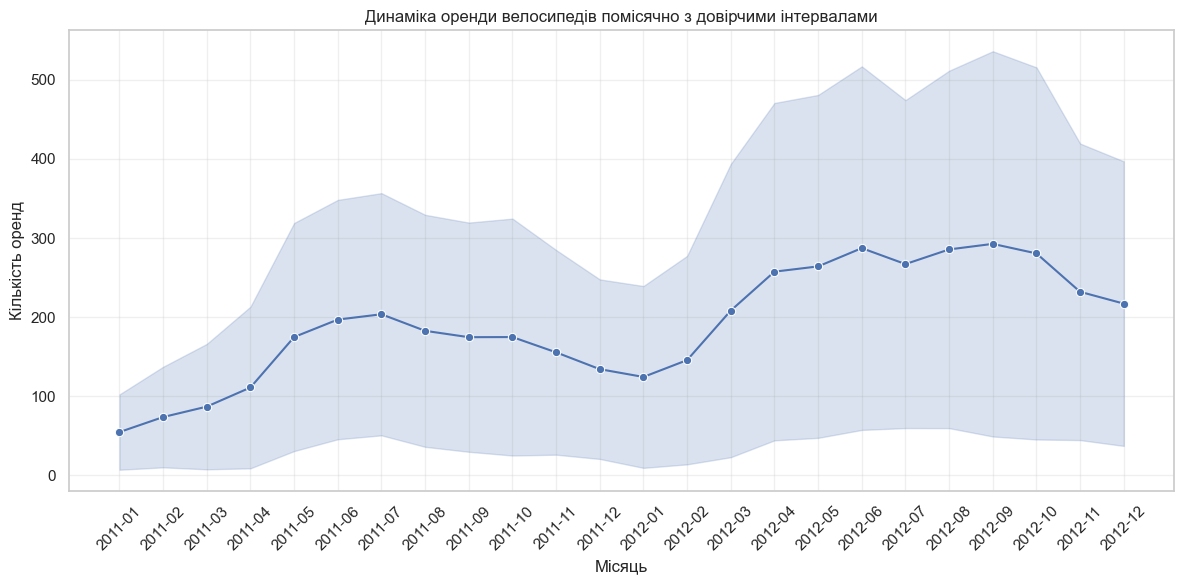

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o')

plt.title('Динаміка оренди велосипедів помісячно з довірчими інтервалами')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [29]:
std_by_month = df.groupby('month_year')['count'].std()
std_by_month.sort_values(ascending=False).head(3)

month_year
2012-09    243.510415
2012-10    235.212983
2012-06    229.811672
Name: count, dtype: float64

**Відповідь:** 
Найбільша варіативність в тих місяцях, де довірчий інтервал приймає найбільше значення. В принципі і по розрахункам, і на графіку видно, що це вересень, жовтень, червень 2012 року.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

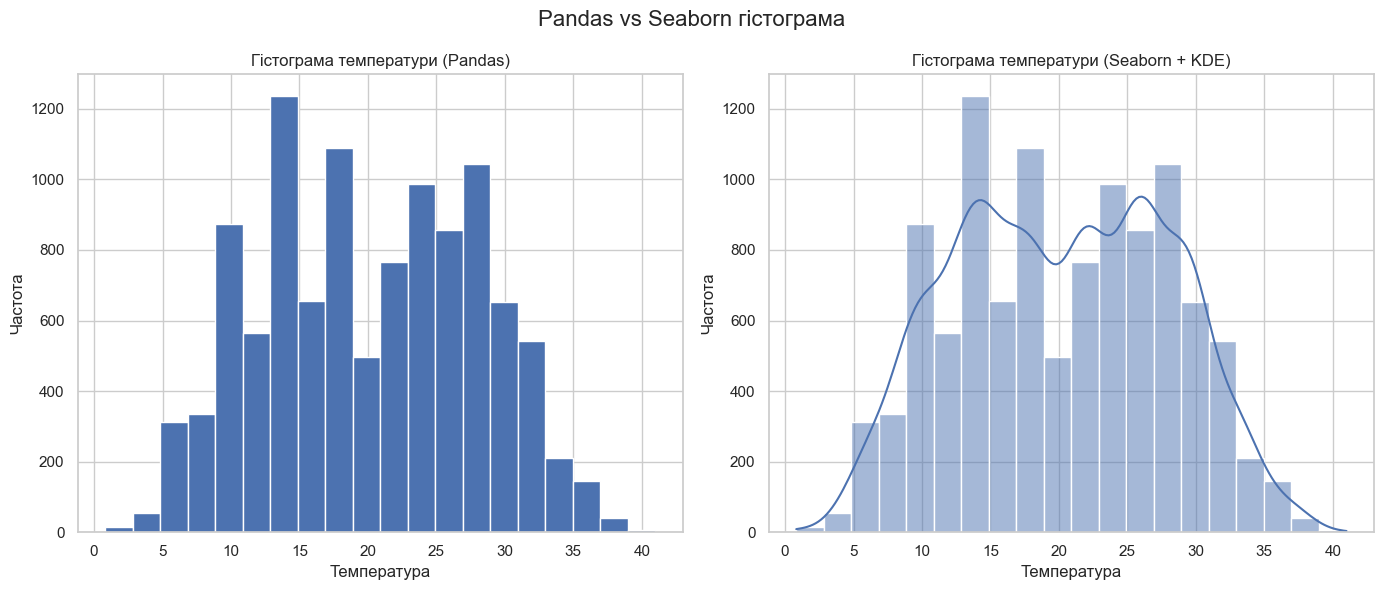

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# Побудова графіка з Pandas
df['temp'].plot.hist(bins=20, ax=ax[0])
ax[0].set_title('Гістограма температури (Pandas)')
ax[0].set_xlabel('Температура')
ax[0].set_ylabel('Частота')

# Побудова графіка з Seaborn
sns.histplot(data=df, x='temp', bins=20, kde=True, ax=ax[1])
ax[1].set_title('Гістограма температури (Seaborn + KDE)')
ax[1].set_xlabel('Температура')
ax[1].set_ylabel('Частота')

plt.suptitle('Pandas vs Seaborn гістограма', fontsize=16)
plt.tight_layout()
plt.show()

**Відповідь:** 
1. Гістограма виконана з **Seaborn** виглядає більш візуально естетичною, лінія KDE також збільшує наглядність данних на графіку.
2. KDE - це лінія, яка допомагає зрозуміти щільність розподілу, на відміну від бінів дає більш плавне лінійне бачення розподілу даних.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

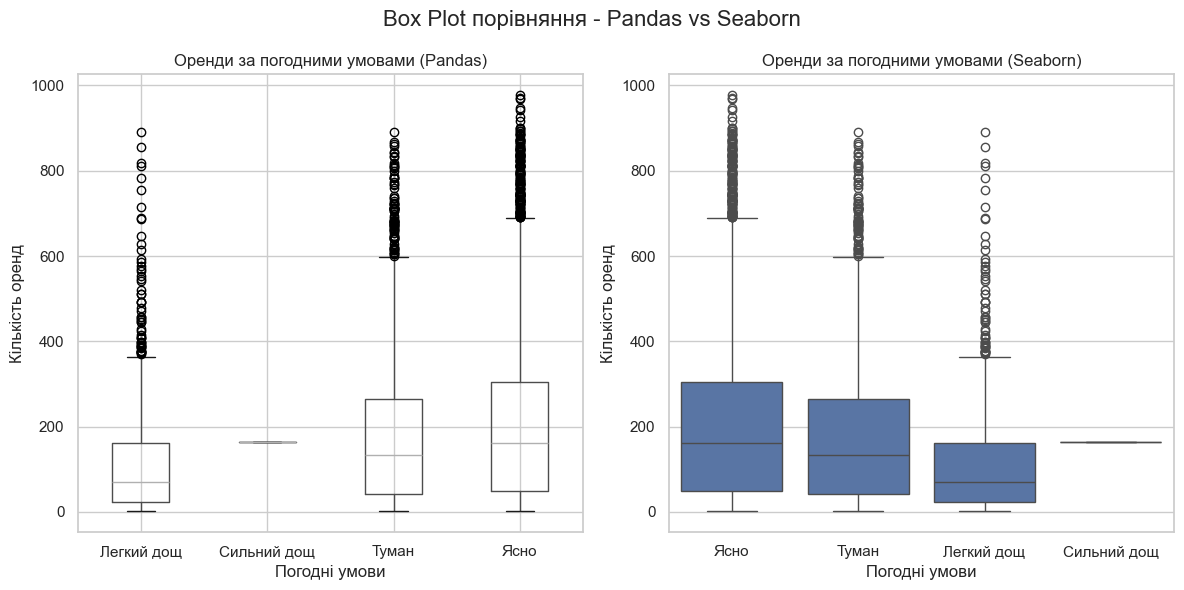

In [52]:
weather_map = {1: 'Ясно', 2: 'Туман', 3: 'Легкий дощ', 4: 'Сильний дощ'}
df['weather_label'] = df['weather'].map(weather_map)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Побудова графіка з Pandas
df.boxplot(column='count', by='weather_label', ax=ax[0])
ax[0].set_title('Оренди за погодними умовами (Pandas)')
ax[0].set_xlabel('Погодні умови')
ax[0].set_ylabel('Кількість оренд')

# Побудова графіка з Seaborn
sns.boxplot(data=df, x='weather_label', y='count', ax=ax[1])
ax[1].set_title('Оренди за погодними умовами (Seaborn)')
ax[1].set_xlabel('Погодні умови')
ax[1].set_ylabel('Кількість оренд')

plt.suptitle('Box Plot порівняння - Pandas vs Seaborn', fontsize=16)
plt.tight_layout()
plt.show()

**Відповідь:**

**Box Plot з Pandas** немає кольорового заповнення за замовчуванням, медіанна лінія сіра, хоча можна їй задати колір за потреби і бажання, самі бокси мають більш вужчу форму, викиди позначені більш яскравим чорним, тому важко оцінити їх кучність, так як вони дуже зливаються, також категоріальні labels по осі ОХ не впорядковані за логікою погіршення погодніх умов за замовчуванням, але це також можна доналаштувати за допомогою методу .Categorical.

**Box Plot з Seaborn** бокси мають ширшу форму та кольорове заповнення за замовчуванням, яке можна змінити зробивши мапінг погодних умов за необхідності, категоріальні labels по осі ОХ впорядковані автоматично, викиди мають меншу контрастність і більшу наглядність.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


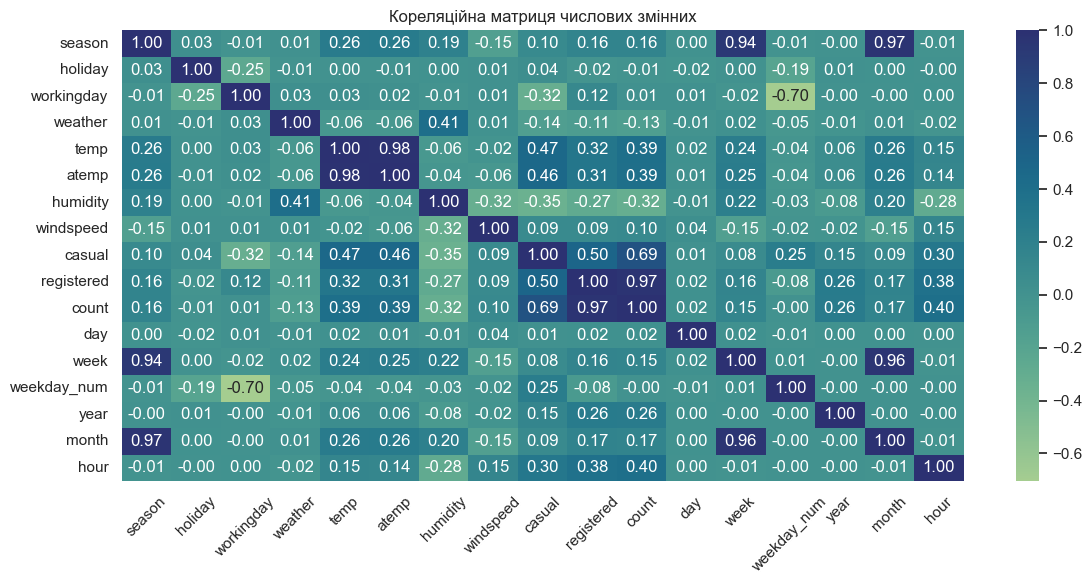

In [82]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="crest", cbar=True)
plt.xticks(rotation=45)
plt.title("Кореляційна матриця числових змінних")
plt.tight_layout()
plt.show()

**Відповідь:** 
1. Найсильніша позитивна кореляція *count* з показником *registered*, на другому місці кореляція з показником *casual* - це логічно, бо чим більше зареєстрованих користувачів, то більше загальна кількість оренди, це ж справедливо і для звичайних користувачів. Позитивна кореляція також є з показником *hour* - піковий час збільшує попит та з показниками *temp*, *atemp*  - бо тепліша погода збільшує попит. 

2. Високе значення кореляції між temp та atemp (0,98) означає те, що  відчутна температура залежить від фактичної температури, різниця між ними не буде дуже великою.

3. Найсильніша негативна кореляція між змінними *workingday* і *weekday_num* (-0,70) якщо це робочий день (workingday - 1), то weekday_num має бути низьким (понеділок - 0, вівторок - 1, і т.д.), а на вихідних (коли workingday - 0) weekday_num має високе значення (субота - 5, неділя - 6).

Негативна кореляція між змінними *casual* і *workingday* (-0,32) - звичайні користувачі орендують менше у робочі дні, бо вони частіше орендують на вихідних.

Негативна кореляція між змінними *holiday* і *workingday* (-0,25) -  бо святковий день, це не робочий день.

Негативна кореляція між змінними *registered*, *casual*, *count* і *humidity* - зареєстровані, звичайні користувачі і загальна кількість оренди знижуються при вищій вологості.

Негативна кореляція між змінними *windspeed* і *humidity* (-0,32) - зі збільшенням сили вітру знижується рівень вологості.

Негативна кореляція між змінними *count* і *weather* (-0,13) - загальна кількість оренди зменшується при погіршенні погоди.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


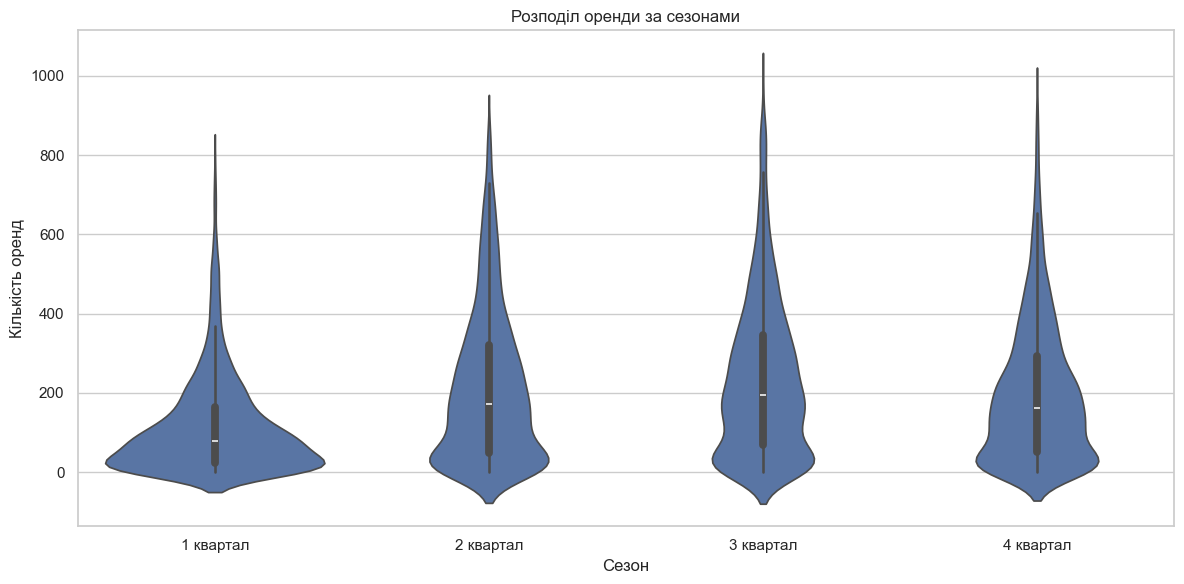

In [67]:
season_map = {1: '1 квартал', 2: '2 квартал', 3: '3 квартал', 4: '4 квартал'}
df['season_label'] = df['season'].map(season_map)

plt.figure(figsize=(12, 6))
sns.violinplot(df, x='season_label', y='count')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.title('Розподіл оренди за сезонами')
plt.tight_layout()
plt.show()

**Відповідь:** 
1. Товщина Violin Plot показує щільність розподілу даних на графіку. Широке місце вказує на найбільше скупчення кількості точок даних (в данному випадку найвища частота кількості оренди).

2. Діаграма розподілу оренди за 1 квартал дуже широка і нижча за інші, її значення сконцентровані біля нуля, тому тут варіабельність найменша. Найбільша варіабельність спостерігається у 3 кварталі (*липень*, *серпень*, *вересень*), хоча 2 та 4 квартали також мають високий розкид. Найвище значення медіани також у 3 кварталі, частота значень зберігається до високих значень оренди, якщо порівнювати з іншими кварталами, що свідчить про найбільший діапазон оренди.

3. Основна перевага Violin Plot над Box Plot, як на мене, полягає в тому, що Box Plot показує лише квартилі та медіану, і повністю приховує форму розподілу, а Violin Plot показує повну форму розподілу даних та дає оцінку щільності цього розподілу і може показувати наявність декількох піків даних на відміну від Box Plot.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

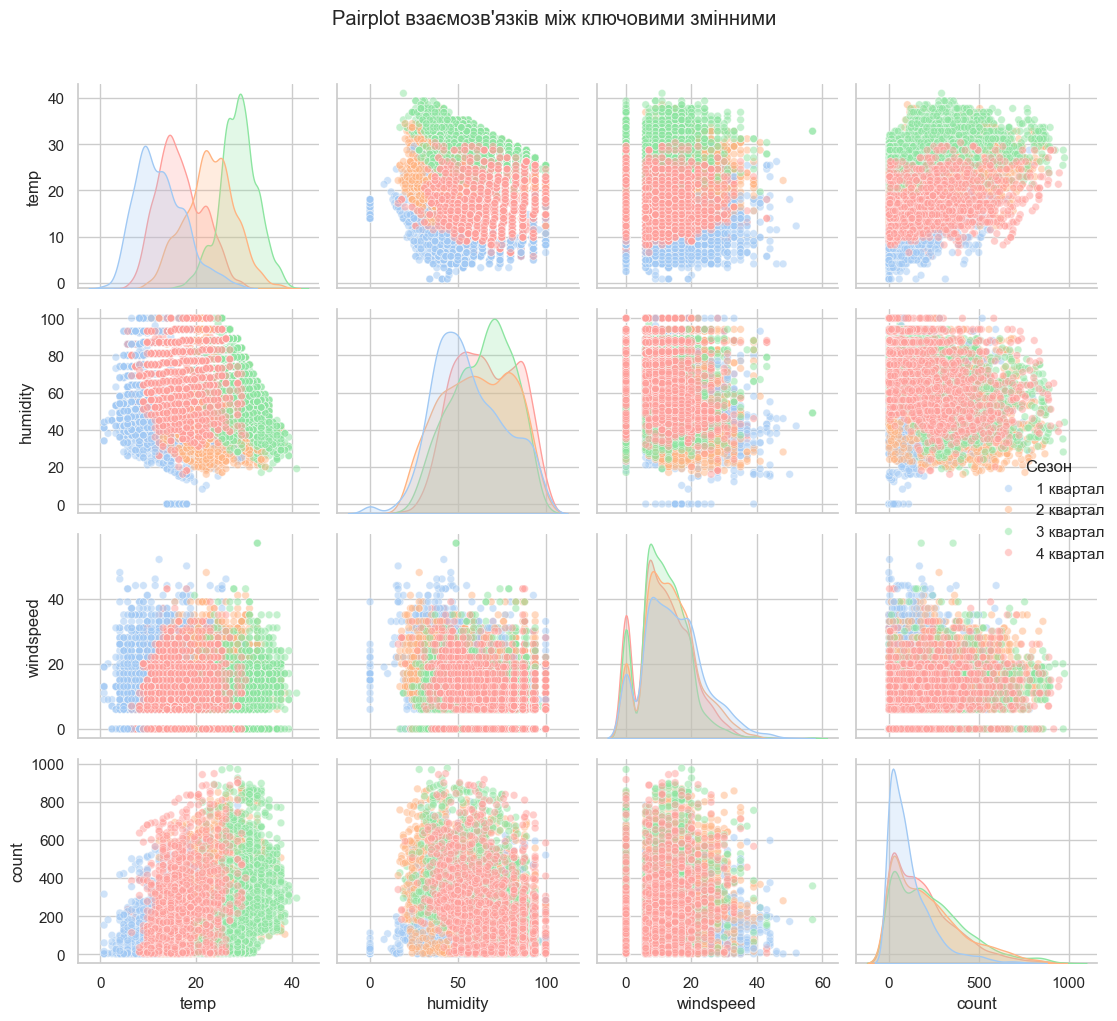

In [84]:
season_map = {1: '1 квартал', 2: '2 квартал', 3: '3 квартал', 4: '4 квартал'}
df['season_label'] = df['season'].map(season_map)

g = sns.pairplot(df, vars=['temp', 'humidity', 'windspeed', 'count'],
    hue='season_label', palette='pastel', plot_kws={'s': 30, 'alpha': 0.5})
g._legend.set_title("Сезон")
plt.suptitle("Pairplot взаємозв'язків між ключовими змінними", y=1.02)
plt.tight_layout()
plt.show()

**Відповідь:** 
1. Найсильніший лінійний зв'язок на діаграмах розсіювання спостерігається між змінними *temp* та *count*. На першому графіку в нижньому рядку видно, що коли температура зростає - загальна кількість оренди також зростає.

2. Найбільш виразно від сезону змінюються значення *count* (сезонність найбільше впливає на кількість оренди) та *temp* (температура - це як маркер сезону, розподіл значень температури також найбільше змінюється від зміни сезону).

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

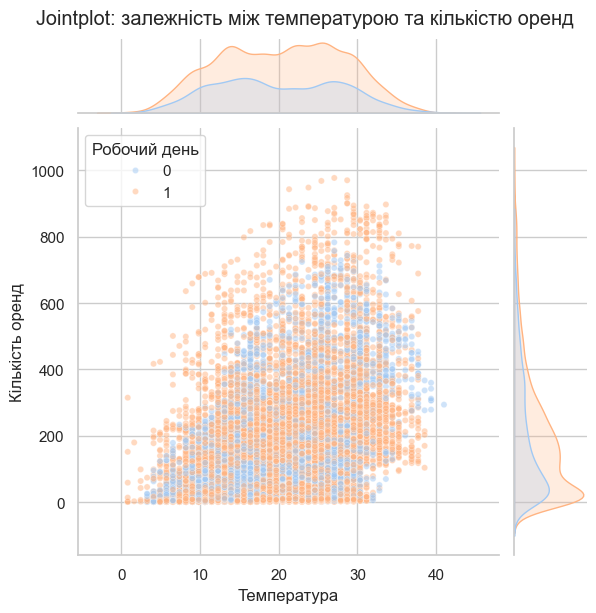

In [80]:
sns.jointplot(df, x='temp', y='count', hue='workingday', palette='pastel', s=20, alpha=0.5)
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.legend(title='Робочий день')
plt.suptitle("Jointplot: залежність між температурою та кількістю оренд", y=1.02)
plt.show()

**Відповідь:** 
1. Графіки по краях показують розподіл даних для кожної змінної окремо. Верхній графік показує саме розподіл кількості оренд. Червона лінія (робочий день) вища за блакитну, що свідчить про частішу оренду у робочі дні. Правий графік показує загальний розподіл температури у всьому датасеті, незалежно від кількості оренди. Червона лінія виглядає ширшою та вищою, ніж блакитна, бо в даних більше значень температури за робочі дні, бо їх природно більше, ніж вихідних (5 робочих проти 2 вихідних).

2. На графіку видно, що максимальний попит (все що вище 800) досягається в саме в робочі дні. Але також видно, що в діапазоні від 400 до 800 переважають блакитні точки. Тож можна зробити висновок, що у вихідні дні попит є стабільно високим протягом періоду більш теплих температур - це використання у великій кількості для відпочинку в гарну погоду. У робочі дні навіть за невисоких температур є стабільно високий рівень оренди і з підвищенням температури показники оренди досягають піків - це масове використання для робочих поїздок, поїздок на навчання (комутинг).